** The CNN network for happiness recognition**

We implement the recognition of emotion, which will be used for labeling videos.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


# GPU
gpu_device = 0
torch.cuda.set_device(gpu_device)
print('Chosen GPU device: ' + str(torch.cuda.current_device()))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Chosen GPU device: 0


In [17]:
from make_dataloader import *
import pickle
load = False
batch_size = 75
try:
    if load:
        loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
    else:
        make_dataloader(only_two = True, batch_size = batch_size)
        loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
except (OSError, IOError) as e:
    make_dataloader(only_two = True, batch_size = batch_size)
    loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))

   emotion                                             pixels     Usage
0        1  [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....  Training
1        1  [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...  Training
2        1  [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...  Training
3        1  [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....  Training
4        1  [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  Training
[array([  70.,   80.,   82., ...,  106.,  109.,   82.])
 array([ 151.,  150.,  147., ...,  193.,  183.,  184.])
 array([ 231.,  212.,  156., ...,   88.,  110.,  152.]) ...,
 array([  74.,   81.,   87., ...,  188.,  187.,  187.])
 array([ 222.,  227.,  203., ...,  136.,  136.,  134.])
 array([ 195.,  199.,  205., ...,    6.,   15.,   38.])]
Data preprocessed


In [5]:
train_loader = loaders['train_loader']
valid_loader = loaders['valid_loader']
test_loader = loaders['test_loader']

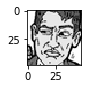

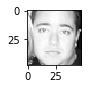

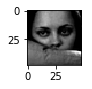

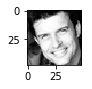

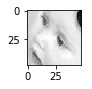

In [6]:
a = 0
for img,j in train_loader:
    plt.figure(figsize = (10,1))
    plt.imshow(img[0].numpy()[0], cmap="Greys_r")
    plt.show()
    a+=1
    if a >4:
        break

In [7]:
from emoCNN import *
import emoSolver
model = emoCNNnet(kernels = [16,8])
solver = emoSolver.emoSolver(optim_args={"lr": 0.01})

<bound method Module.parameters of emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (5): ReLU ()
    (6): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (7): Conv2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (8): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True)
    (9): ReLU ()
    (10): Conv2d(8, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (11): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True)
    (12): ReLU ()
    (13): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Linear (1152 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)>


In [8]:
solver.train(model, train_loader, valid_loader, log_nth=100, num_epochs=20)

START TRAIN.
[iteration 0/940] TRAIN loss : 0.683852
[iteration 0/940] VALID acc/loss : 0.608000/0.726293
[Epoch 0/20] TRAIN acc/loss : 0.773333/0.547437
[Epoch 0/20] VALID acc/loss : 0.746667/0.514079
[Epoch 1/20] TRAIN acc/loss : 0.800000/0.447834
[Epoch 1/20] VALID acc/loss : 0.829333/0.418733
[iteration 100/940] TRAIN loss : 0.412677
[iteration 100/940] VALID acc/loss : 0.829333/0.341259
[Epoch 2/20] TRAIN acc/loss : 0.786667/0.409527
[Epoch 2/20] VALID acc/loss : 0.840000/0.389230
[Epoch 3/20] TRAIN acc/loss : 0.800000/0.376324
[Epoch 3/20] VALID acc/loss : 0.850667/0.366386
[iteration 200/940] TRAIN loss : 0.468786
[iteration 200/940] VALID acc/loss : 0.864000/0.323526
[Epoch 4/20] TRAIN acc/loss : 0.840000/0.360506
[Epoch 4/20] VALID acc/loss : 0.872000/0.309081
[Epoch 5/20] TRAIN acc/loss : 0.866667/0.340441
[Epoch 5/20] VALID acc/loss : 0.890667/0.282600
[iteration 300/940] TRAIN loss : 0.246121
[iteration 300/940] VALID acc/loss : 0.906667/0.237094
[Epoch 6/20] TRAIN acc/loss

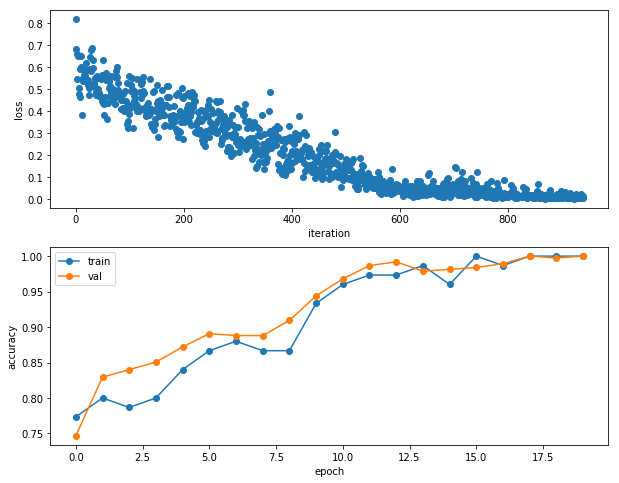

In [11]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [19]:
#we save as state dictionnary and as torch serialization object
torch.save(model.state_dict(),'./emoCNNtrivialdic')
model.save('./emoCNNtrivial')
# how to load it :
# m = torch.load(open('./emoCNNtrivialdic','rb'))
# m2 = emoCNNnet(kernels = [12,6])
# m2.load_state_dict(torch.load('./emoCNNtrivialdic'))
# m2

Saving model... ./emoCNNtrivial


<class 'torch.FloatTensor'>


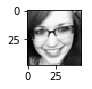

Variable containing:
 6.9304
-6.8868
[torch.cuda.FloatTensor of size 2 (GPU 0)]



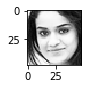

Variable containing:
 3.1801
-3.0650
[torch.cuda.FloatTensor of size 2 (GPU 0)]



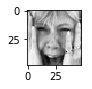

Variable containing:
-4.0019
 4.2939
[torch.cuda.FloatTensor of size 2 (GPU 0)]



In [16]:
#visualise some results to test the model
a = 0
import scipy.misc
for img,j in train_loader:
    result = model(Variable(img).cuda(0))
    print(type(img))
    for i in range(4,7):
        plt.figure(figsize = (10,1))
        plt.imshow(img[i].numpy()[0], cmap="Greys_r")
        plt.show()    
        print(result[i])
    break